## Fuzzy Connectness Implementation in Python
* Author: Fernando Santos
* Based on "Fuzzy-connected 3D image segmentation at interactive speeds", A. Falcao, J. Udupa, et al
* Based on https://github.com/1danielcoelho/ImageJ-Seg-FuzzyConnectedness

##### Import FuzzyConnector class

In [7]:
from FuzzyConnectedness import FuzzyConnector

In [8]:
from skimage import io
from skimage import data
from skimage.color import gray2rgb
import numpy.ma as ma
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#%matplotlib inline

##### Helper functions for plotting

In [9]:
def get_conn_scene_plot(img, cs, threshold=0):
    cs_img = cs.reshape(img.shape)
    rgb_img = gray2rgb(img)
    segmentation_mask = ma.masked_array(cs_img > threshold, cs_img)
    segmentation_mask

    rgb_img[segmentation_mask] = [0,255,0]
    return rgb_img
    

In [10]:
def plot_conn_scene(img, cs, threshold=0, figsize=None, title=""):
    cs_img = cs.reshape(img.shape)
    rgb_img = gray2rgb(img)
    segmentation_mask = ma.masked_array(cs_img > threshold, cs_img)
    segmentation_mask

    rgb_img[segmentation_mask] = [0,255,0]
    plt.figure(figsize=figsize)
    plt.imshow(rgb_img, cmap='gray')
    plt.title(title)
    plt.show()

In [11]:
def evaluate(img, cs, goldstd, debug=False):
    img_cs = cs.reshape(img.shape)
    img_seg = set(zip(np.array(np.where(img_cs > 0))[1], np.array(np.where(img_cs > 0))[0]))
    
    TP = len(img_seg.intersection(goldstd)) / len(goldstd) * 100
    FP = len(img_seg.difference(goldstd)) / len(goldstd) * 100
    ACC = (TP + (100.0 - FP))/2
    if debug:
        print("TP: {}%\nFP: {}%\nACC: {}%".format(round(TP,1), round(FP,1), round(ACC,1) ))
    return TP, FP, ACC

    

### Testing algorithm

#### Get gold standars for sample image

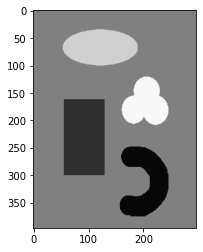

In [20]:
img = io.imread('../imagens/fig_GoldStd2.tif', plugin='imageio')

pixel_elipse = 209
goldstd_elipse = set(zip(np.array(np.where(img == pixel_elipse))[1], np.array(np.where(img == pixel_elipse))[0]))

pixel_quadrado = 53
goldstd_quadrado = set(zip(np.array(np.where(img == pixel_quadrado))[1], np.array(np.where(img == pixel_quadrado))[0]))

pixel_c_invertido=14
goldstd_c_invertido = set(zip(np.array(np.where(img == pixel_c_invertido))[1], np.array(np.where(img == pixel_c_invertido))[0]))

pixel_arvore=248
goldstd_arvore = set(zip(np.array(np.where(img == pixel_arvore))[1], np.array(np.where(img == pixel_arvore))[0]))

plt.imshow(img, cmap='gray')



#### Read a sample Image

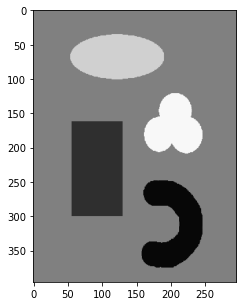

In [21]:
img = io.imread('../imagens/fig_GoldStd2.tif', plugin='imageio')
img = img.astype(np.int64, casting='unsafe')

#img = io.imread('../imagens/1.3.12.2.1107.5.2.31.30514.2020061009191898313108277.tif', plugin='imageio')
#img = io.imread('../imagens/fig_speckled_cv=0.05.tif', plugin='imageio')
#img = io.imread('../imagens/fig_speckled_cv=0.10.tif', plugin='imageio')
#img = io.imread('../imagens/fig_speckled_cv=0.30.tif', plugin='imageio')
#img = io.imread('../imagens/fig_speckled_cv=0.50.tif', plugin='imageio')


fig = plt.figure(figsize=(5,5))


plt.imshow(img, cmap='gray')
plt.show()


#### Run Fuzzy Connectedness Segmentation

In [22]:
%%time
#fz = FuzzyConnector(img, [(120,60), (200, 170), (1006200), (200,350)],threshold=0.5)
fz = FuzzyConnector(img, [(120,60), (134,65), (134,64), (133,65), (135,65)],threshold=0.4)
#fz = FuzzyConnector(img, [(412, 22), (395, 89), (378, 157), (370, 230), (367, 300), (372, 368), (392, 431)],threshold=0.3)

cs = fz.run()


Wall time: 1.05 s


#### Plot Segmented Area in green

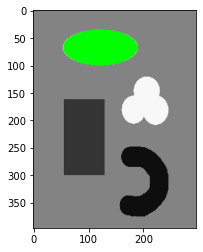

In [23]:
plot_conn_scene(img, cs)
_ = evaluate(img, cs, goldstd_arvore)

##### Show different options of seeds for the experiment

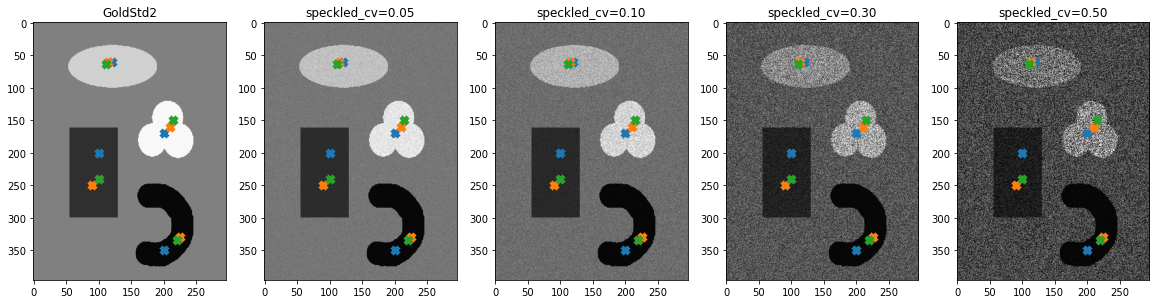

In [240]:
imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
seeds1 = [(120,60), (200, 170), (100,200), (200,350)]
seeds2 = [(114,60), (210, 160), (90,250), (225,330)]
seeds3 = [(111,63), (215, 150), (100,240), (220,335)]

titles=['gold']

fig = plt.figure(figsize=(20,10))
axes = fig.subplots(nrows=1, ncols=5)

i=0
for img_path in imgs:
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].scatter(x=[s[0] for s in seeds1],y=[s[1] for s in seeds1], s=10,marker='x', linewidths =10)
    axes[i].scatter(x=[s[0] for s in seeds2],y=[s[1] for s in seeds2], s=10,marker='x', linewidths =10)
    axes[i].scatter(x=[s[0] for s in seeds3],y=[s[1] for s in seeds3], s=10,marker='x', linewidths =10)
    i=i+1

### Testing on diferent images with different seeds

In [63]:
for s in seeds:
    print([s, (s[0]+1,s[1]), (s[0],s[1]+1), (s[0]-1,s[1]),(s[0],s[1]-1)])

[(134, 66), (135, 66), (134, 67), (133, 66), (134, 65)]
[(200, 170), (201, 170), (200, 171), (199, 170), (200, 169)]
[(100, 200), (101, 200), (100, 201), (99, 200), (100, 199)]
[(200, 350), (201, 350), (200, 351), (199, 350), (200, 349)]


<ipython-input-180-2f129101d405>:84: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
<ipython-input-180-2f129101d405>:84: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipp

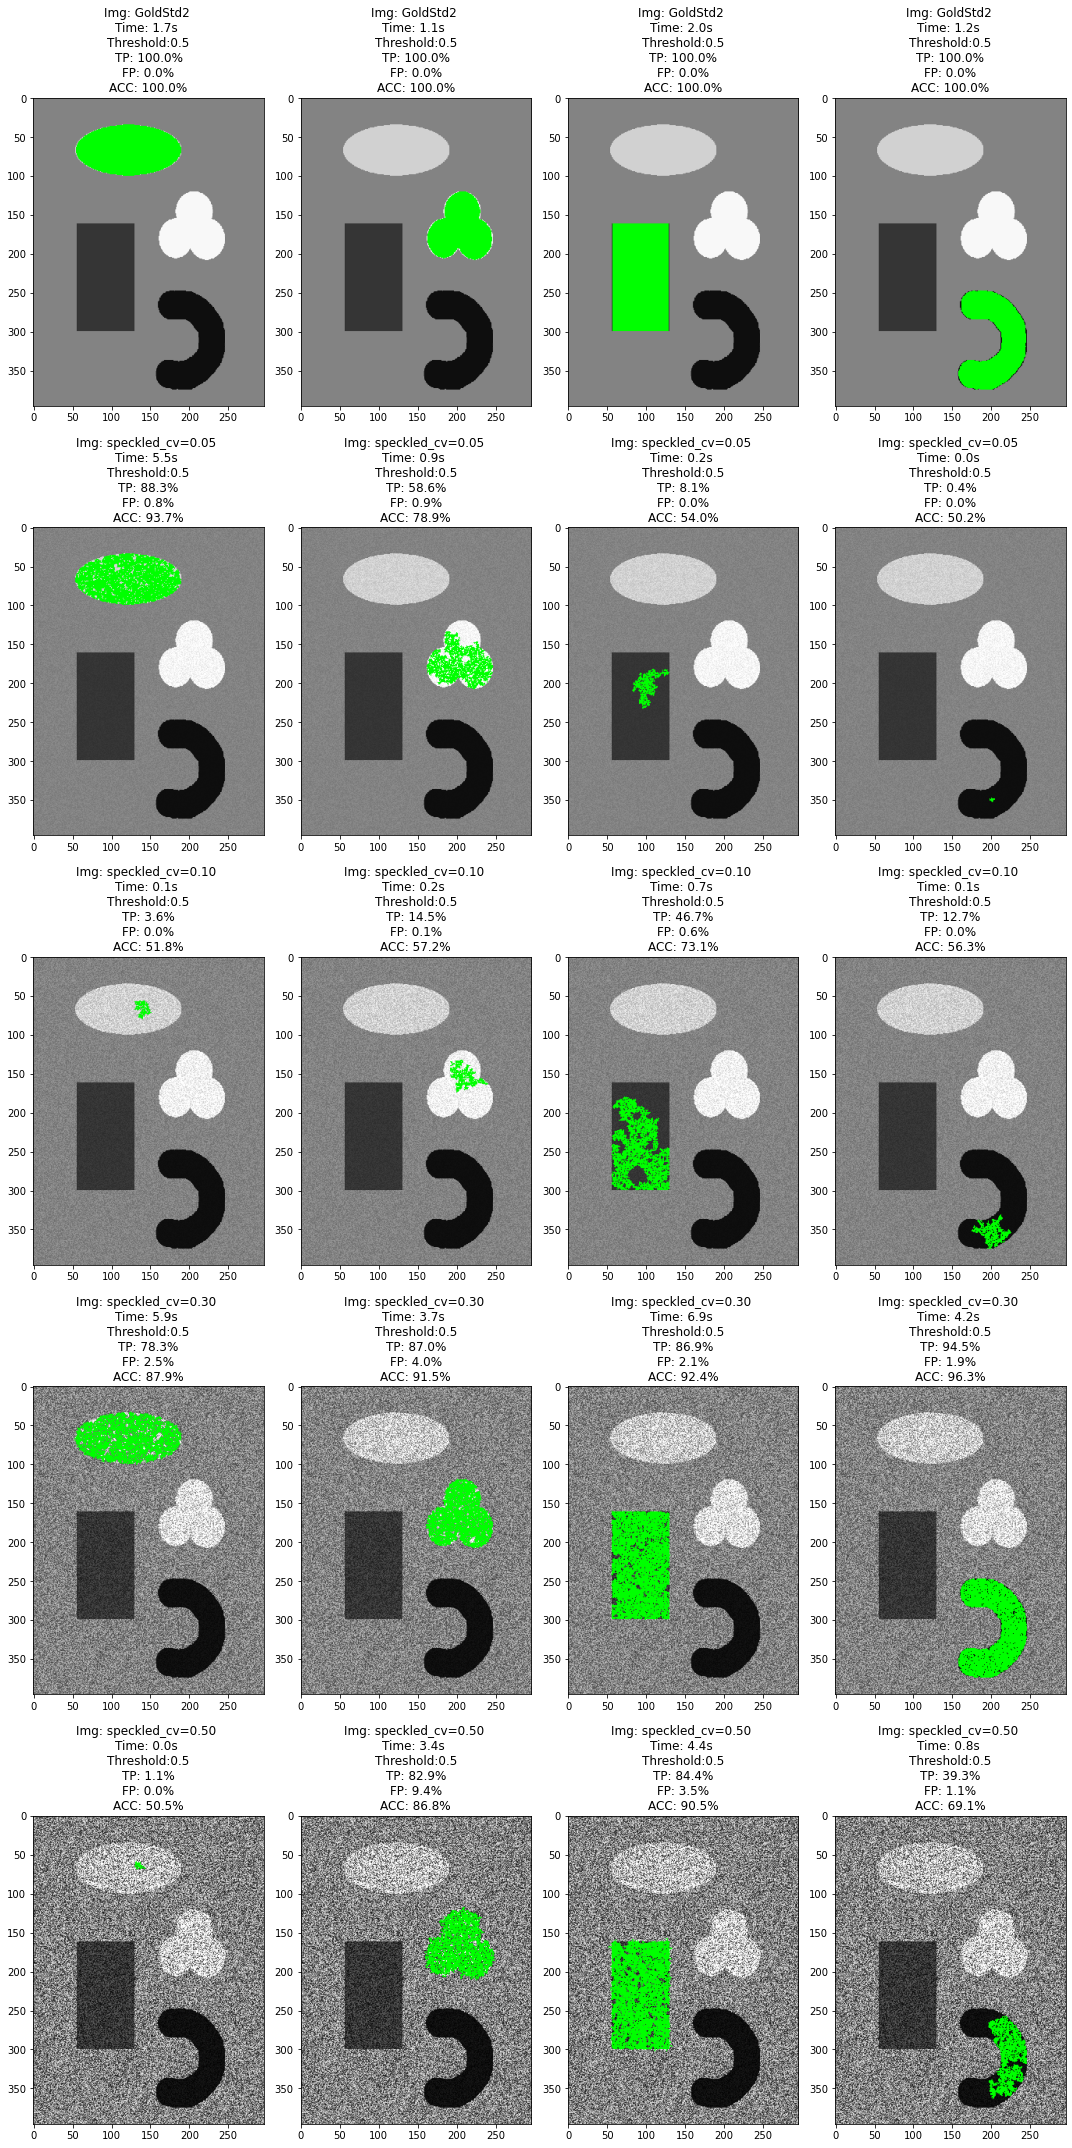

In [197]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
seeds = [(120,60), (200, 170), (100,200), (200,350)]

threshold=0.5

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        #fz = FuzzyConnector(img, [s],threshold=threshold)
        fz = FuzzyConnector(img, [s, (s[0]+2,s[1]), (s[0],s[1]+2), (s[0]-2,s[1]),(s[0],s[1]-2)],threshold=threshold)
        cs = fz.run()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()
results_df_ls_2 = pd.DataFrame(results)

In [198]:
results_df_ls_2.groupby('Imagem').mean()

Tempo exeução  theta      TP%    FP%     ACC%
Imagem                                                         
GoldStd2                  1.500    0.5  100.000  0.000  100.000
speckled_cv=0.05          1.650    0.5   38.850  0.425   69.200
speckled_cv=0.10          0.275    0.5   19.375  0.175   59.600
speckled_cv=0.30          5.175    0.5   86.675  2.625   92.025
speckled_cv=0.50          2.150    0.5   51.925  3.500   74.225

<ipython-input-180-2f129101d405>:84: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
<ipython-input-180-2f129101d405>:84: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipp

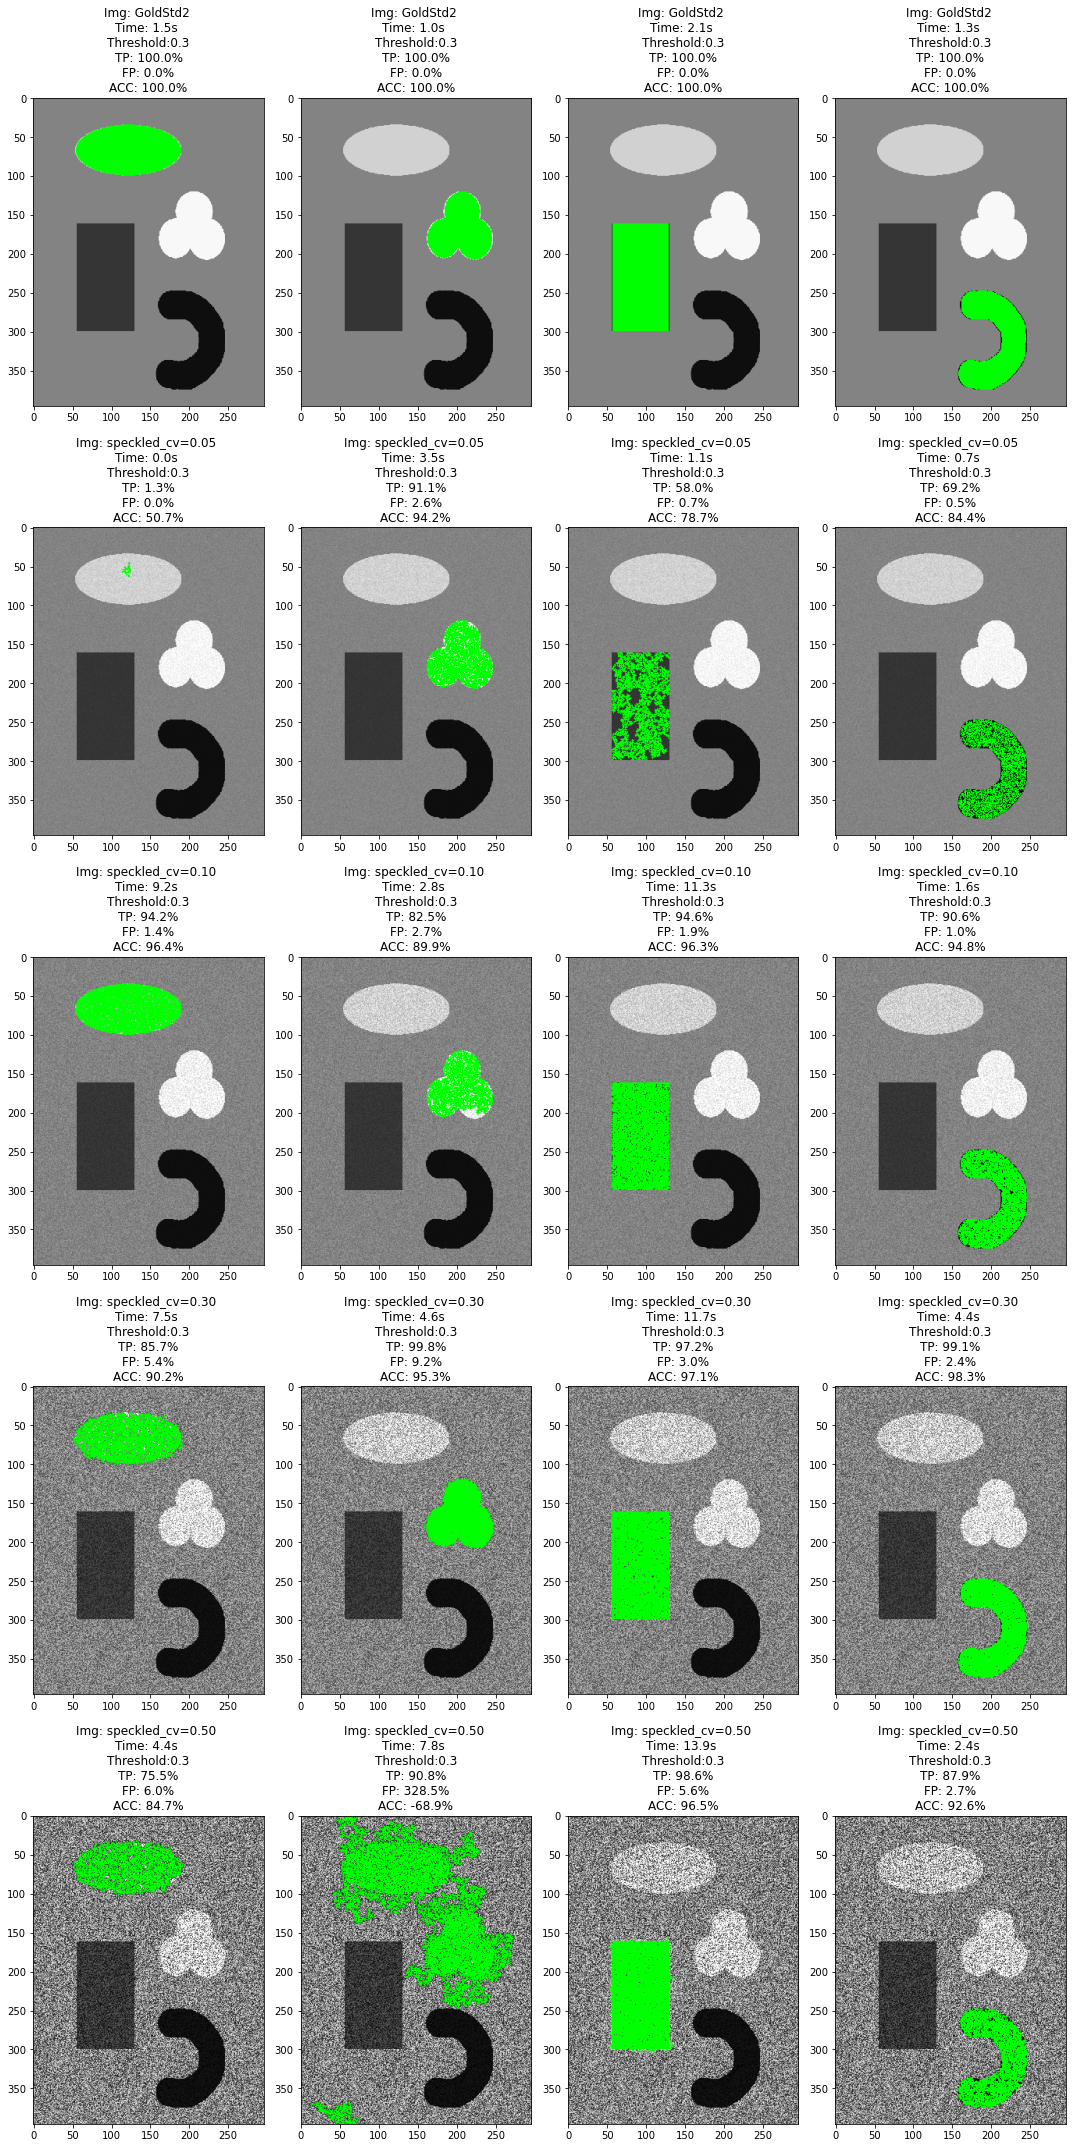

In [228]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
seeds = [(120,60), (200, 170), (100,200), (200,350)]
#seeds = [(114,60), (210, 160), (90,250), (225,330)]
#seeds = [(111,63), (215, 150), (100,240), (220,335)]

threshold=0.3

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        fz = FuzzyConnector(img, [s],threshold=threshold)
        cs = fz.run()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()

results_df_ls_1_seeds1 = pd.DataFrame(results)
#results_df_ls_1_seeds2 = pd.DataFrame(results)
#results_df_ls_1_seeds3 = pd.DataFrame(results)

In [229]:
results_df_ls_1.groupby('Imagem').mean()

Tempo exeução  theta      TP%    FP%     ACC%
Imagem                                                         
GoldStd2                  1.150    0.5  100.000  0.000  100.000
speckled_cv=0.05          1.475    0.5   27.200  0.275   63.450
speckled_cv=0.10          0.425    0.5   21.600  0.200   60.700
speckled_cv=0.30          2.400    0.5   65.100  2.250   81.425
speckled_cv=0.50          1.975    0.5   40.625  5.075   67.775

<ipython-input-180-2f129101d405>:84: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
<ipython-input-180-2f129101d405>:84: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipp

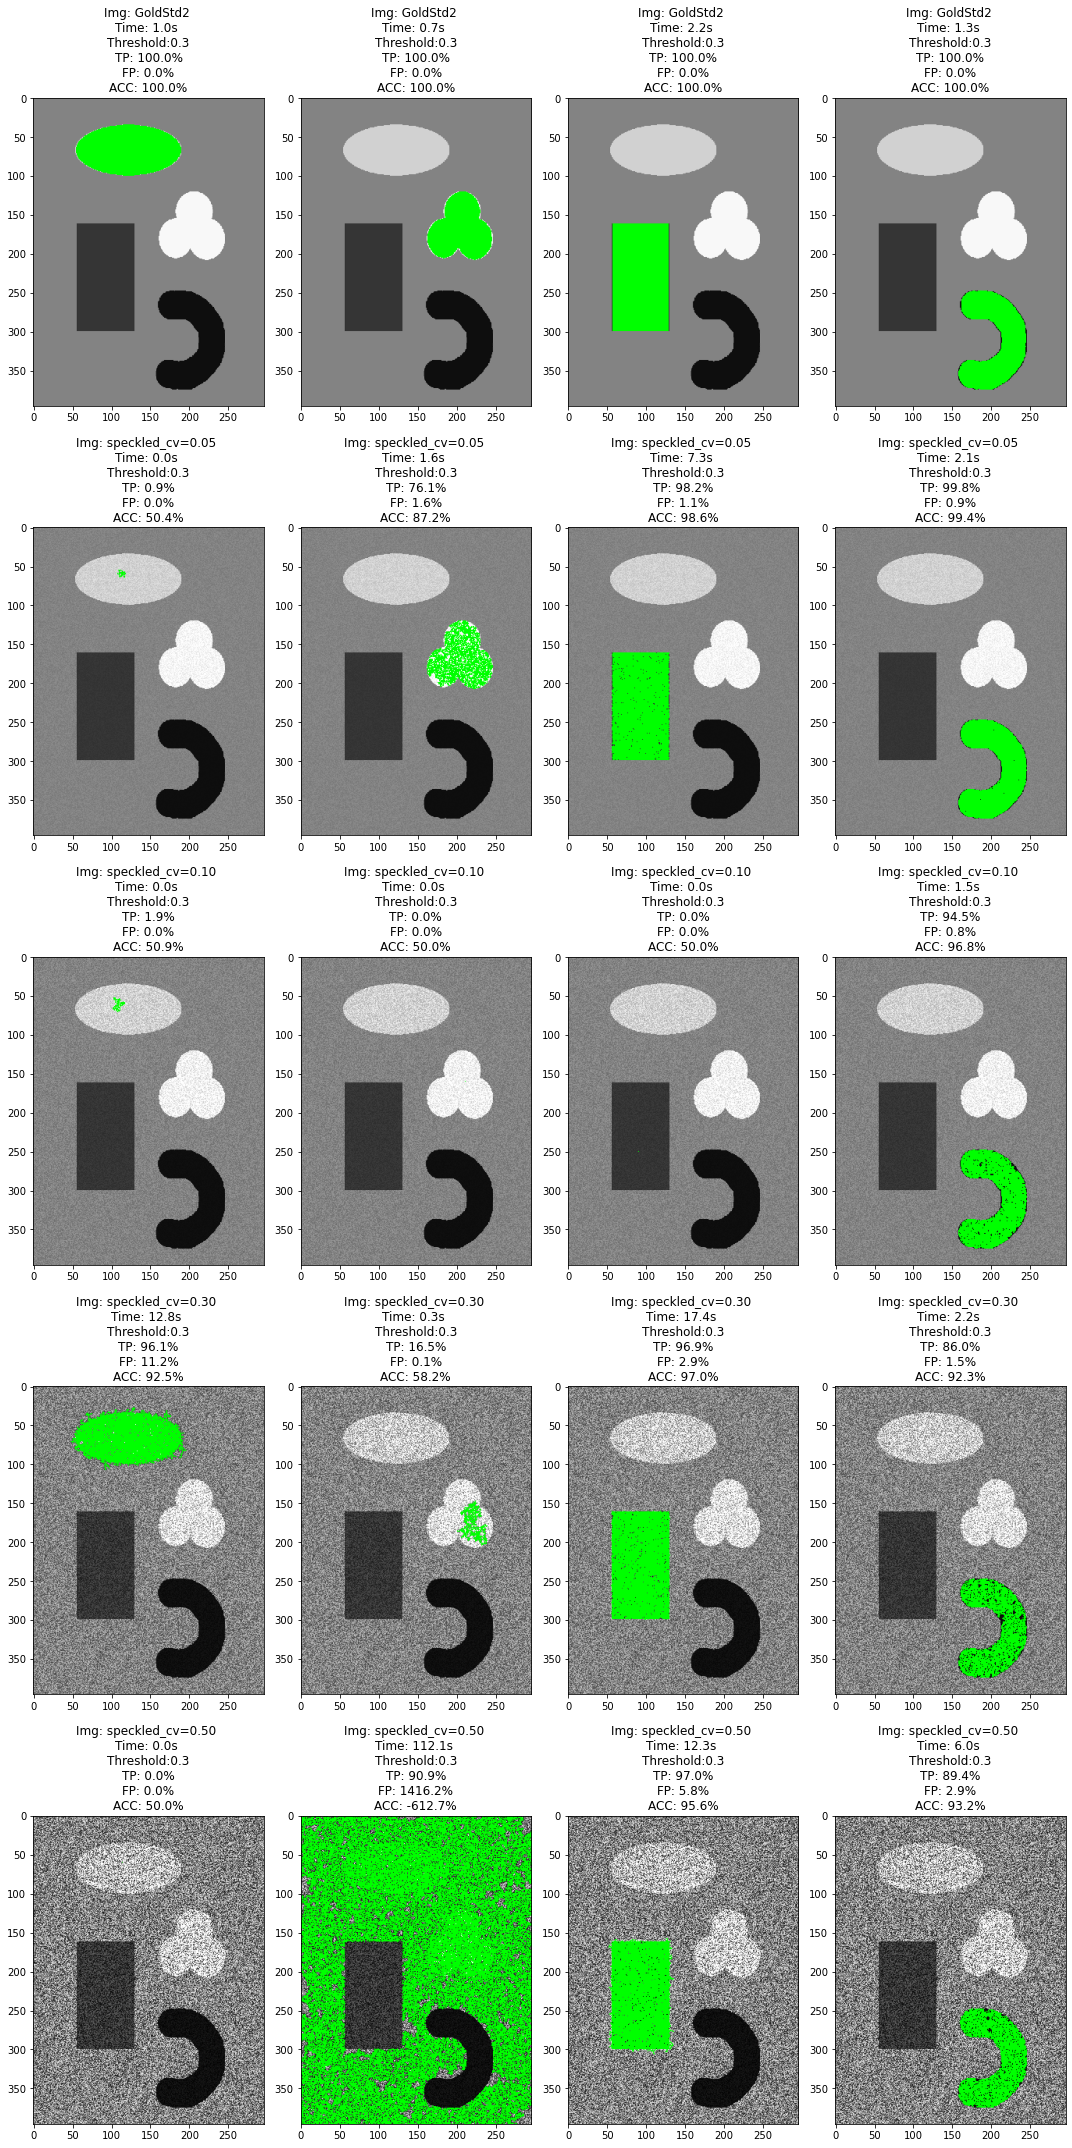

In [230]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
#seeds = [(120,60), (200, 170), (100,200), (200,350)]
seeds = [(114,60), (210, 160), (90,250), (225,330)]
#seeds = [(111,63), (215, 150), (100,240), (220,335)]

threshold=0.3

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        fz = FuzzyConnector(img, [s],threshold=threshold)
        cs = fz.run()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()

#results_df_ls_1_seeds1 = pd.DataFrame(results)
results_df_ls_1_seeds2 = pd.DataFrame(results)
#results_df_ls_1_seeds3 = pd.DataFrame(results)

In [231]:
results_df_ls_1_seeds2.groupby('Imagem').mean()

Tempo exeução  theta      TP%      FP%     ACC%
Imagem                                                           
GoldStd2                  1.300    0.3  100.000    0.000  100.000
speckled_cv=0.05          2.750    0.3   68.750    0.900   83.900
speckled_cv=0.10          0.375    0.3   24.100    0.200   61.925
speckled_cv=0.30          8.175    0.3   73.875    3.925   85.000
speckled_cv=0.50         32.600    0.3   69.325  356.225  -93.475

<ipython-input-180-2f129101d405>:84: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
<ipython-input-180-2f129101d405>:84: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-(1.0/(2.0*sigma*sigma)) * (val - avg) * (val - avg))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipp

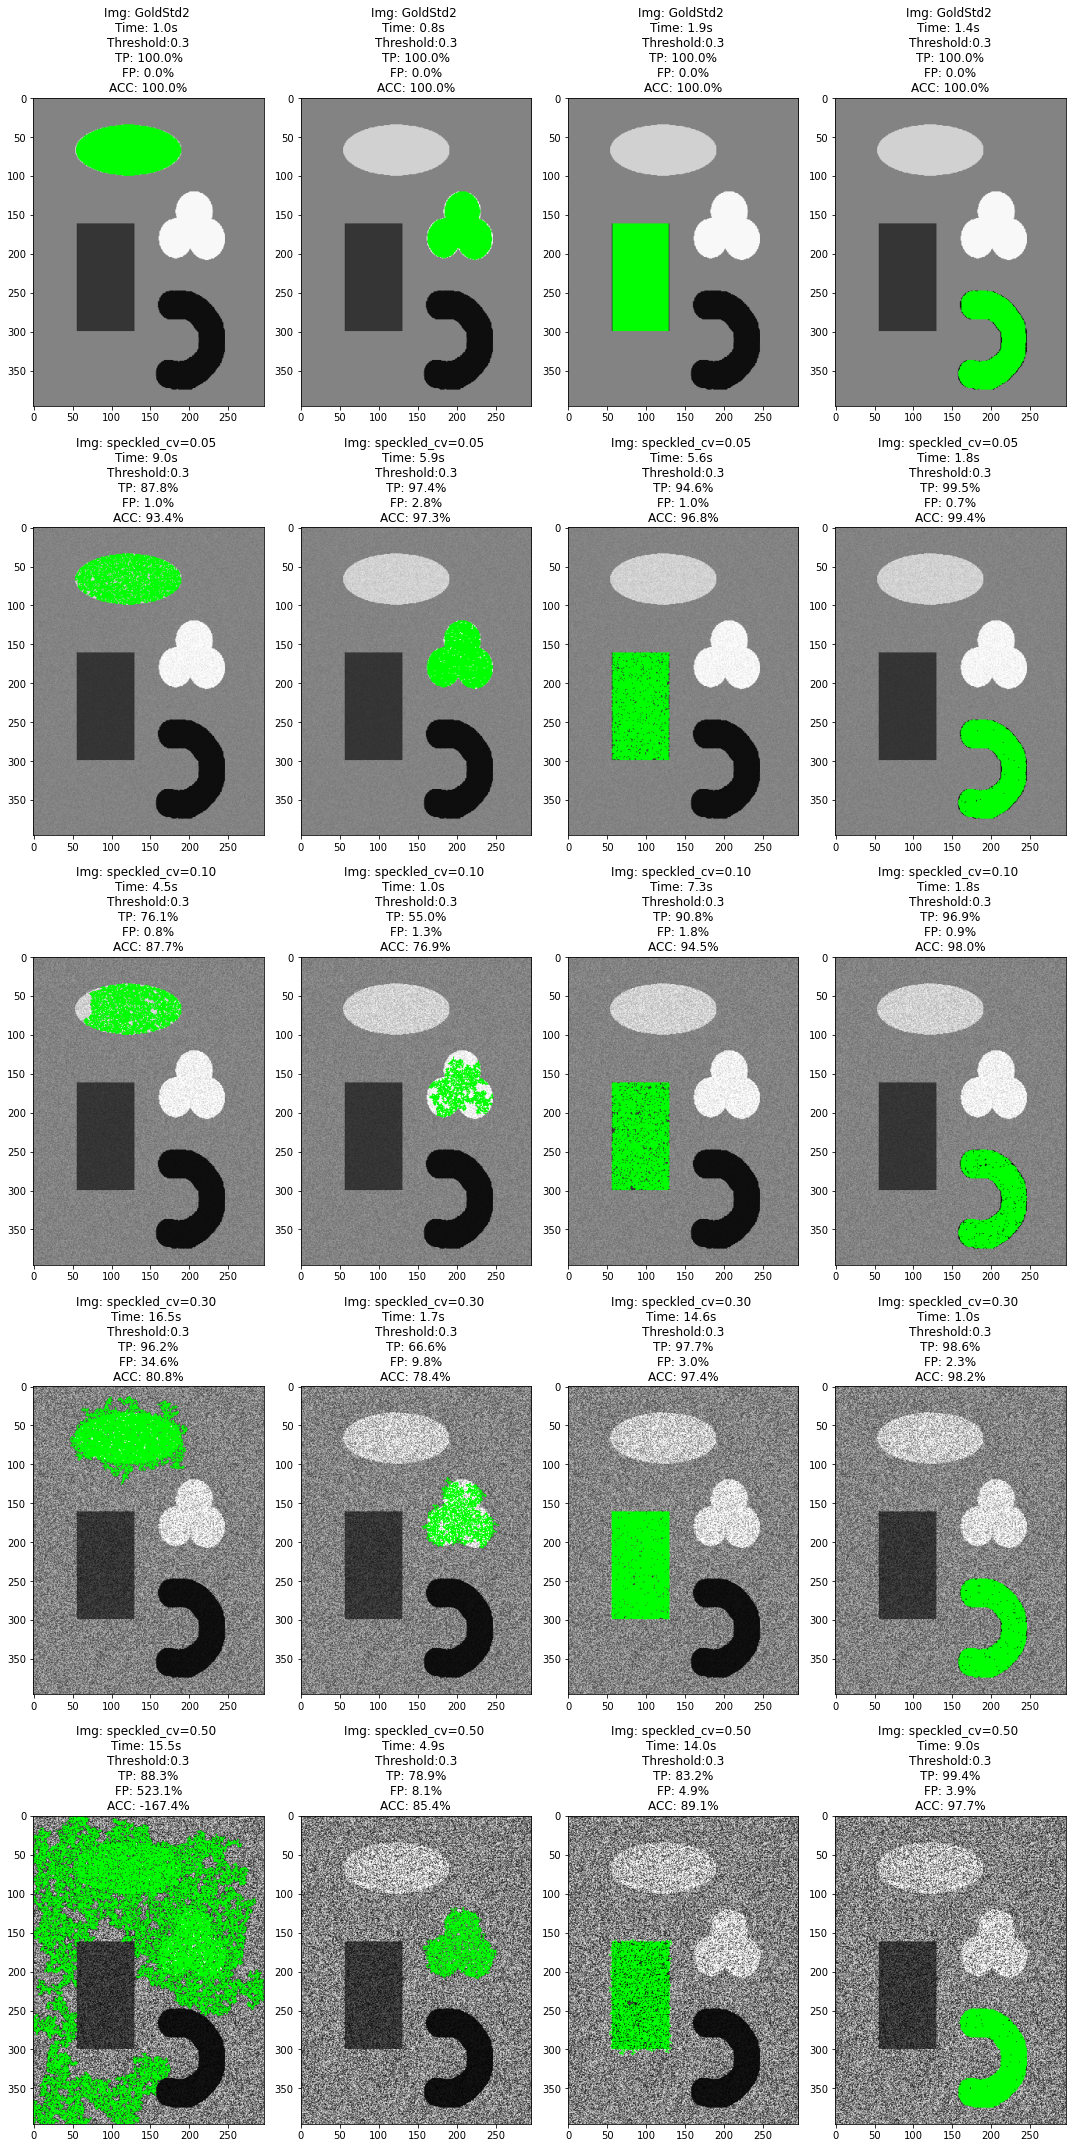

In [232]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
#seeds = [(120,60), (200, 170), (100,200), (200,350)]
#seeds = [(114,60), (210, 160), (90,250), (225,330)]
seeds = [(111,63), (215, 150), (100,240), (220,335)]

threshold=0.3

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        fz = FuzzyConnector(img, [s],threshold=threshold)
        cs = fz.run()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()

#results_df_ls_1_seeds1 = pd.DataFrame(results)
#results_df_ls_1_seeds2 = pd.DataFrame(results)
results_df_ls_1_seeds3 = pd.DataFrame(results)

In [241]:
results_df_ls_1_seeds3.groupby("Imagem").mean()

Tempo exeução  theta      TP%      FP%     ACC%
Imagem                                                           
GoldStd2                  1.275    0.3  100.000    0.000  100.000
speckled_cv=0.05          5.575    0.3   94.825    1.375   96.725
speckled_cv=0.10          3.650    0.3   79.700    1.200   89.275
speckled_cv=0.30          8.450    0.3   89.775   12.425   88.700
speckled_cv=0.50         10.850    0.3   87.450  135.000   26.200

In [285]:
df0 = results_df_ls_1_seeds1.groupby("Imagem").mean()
df1 = results_df_ls_1_seeds1.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="T|TP|FP|ACC").add_suffix(" (S1)")
df2 = results_df_ls_1_seeds2.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="T|TP|FP|ACC").add_suffix(" (S2)")
df3 = results_df_ls_1_seeds3.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="T|TP|FP|ACC").add_suffix(" (S3)")

pd.concat([df0[['theta']], df1, df2, df3,], axis=1)

theta  T (seg) (S1)  TP% (S1)  FP% (S1)  ACC% (S1)  \
Imagem                                                                 
GoldStd2            0.3         1.475   100.000      0.00    100.000   
speckled_cv=0.05    0.3         1.325    54.900      0.95     77.000   
speckled_cv=0.10    0.3         6.225    90.475      1.75     94.350   
speckled_cv=0.30    0.3         7.050    95.450      5.00     95.225   
speckled_cv=0.50    0.3         7.125    88.200     85.70     51.225   

                  T (seg) (S2)  TP% (S2)  FP% (S2)  ACC% (S2)  T (seg) (S3)  \
Imagem                                                                        
GoldStd2                 1.300   100.000     0.000    100.000         1.275   
speckled_cv=0.05         2.750    68.750     0.900     83.900         5.575   
speckled_cv=0.10         0.375    24.100     0.200     61.925         3.650   
speckled_cv=0.30         8.175    73.875     3.925     85.000         8.450   
speckled_cv=0.50        32.600    69.325   356.225    -93.475        10.850   

                  TP% (S3)  FP% (S3)  ACC% (S3)  
Imagem                                           
GoldStd2           100.000     0.000    100.000  
speckled_cv=0.05    94.825     1.375     96.725  
speckled_cv=0.10    79.700     1.200     89.275  
speckled_cv=0.30    89.775    12.425     88.700  
speckled_cv=0.50    87.450   135.000     26.200

### Same test with Label Correcting Algorithm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

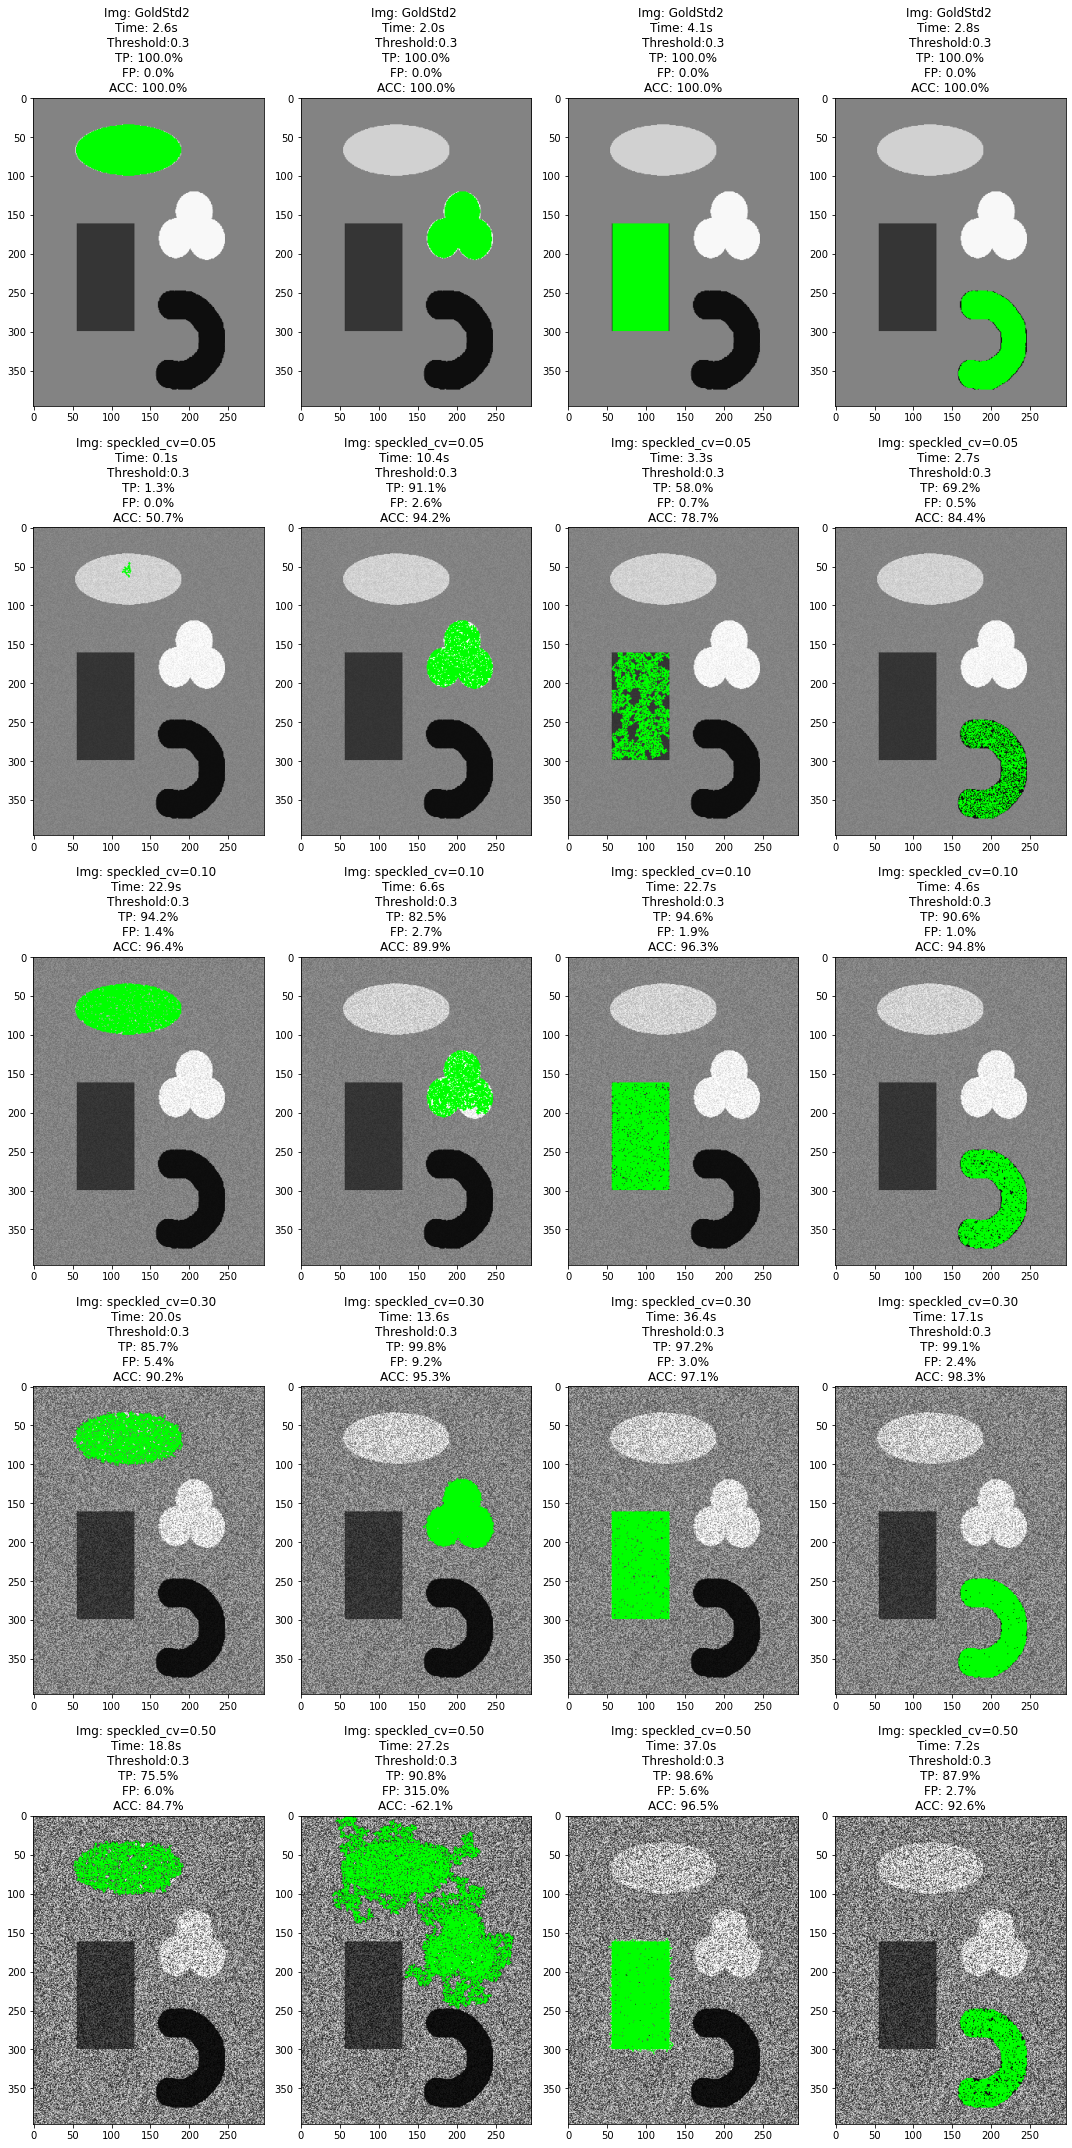

In [349]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
seeds = [(120,60), (200, 170), (100,200), (200,350)]
#seeds = [(114,60), (210, 160), (90,250), (225,330)]
#seeds = [(111,63), (215, 150), (100,240), (220,335)]

threshold=0.3

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        fz = FuzzyConnector(img, [s],threshold=threshold)
        cs = fz.run2()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()

results_df_lc_1_seeds1 = pd.DataFrame(results)
#results_df_lc_1_seeds2 = pd.DataFrame(results)
#results_df_lc_1_seeds3 = pd.DataFrame(results)

In [350]:
results_df_lc_1.groupby('Imagem').mean()

Tempo exeução  theta     TP%    FP%    ACC%
Imagem                                                       
GoldStd2                  0.000    0.5   0.000  0.000  50.000
speckled_cv=0.05          2.675    0.5  27.200  0.275  63.450
speckled_cv=0.10          1.250    0.5  21.600  0.200  60.700
speckled_cv=0.30          6.350    0.5  65.100  2.250  81.425
speckled_cv=0.50          5.500    0.5  40.625  5.075  67.775

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

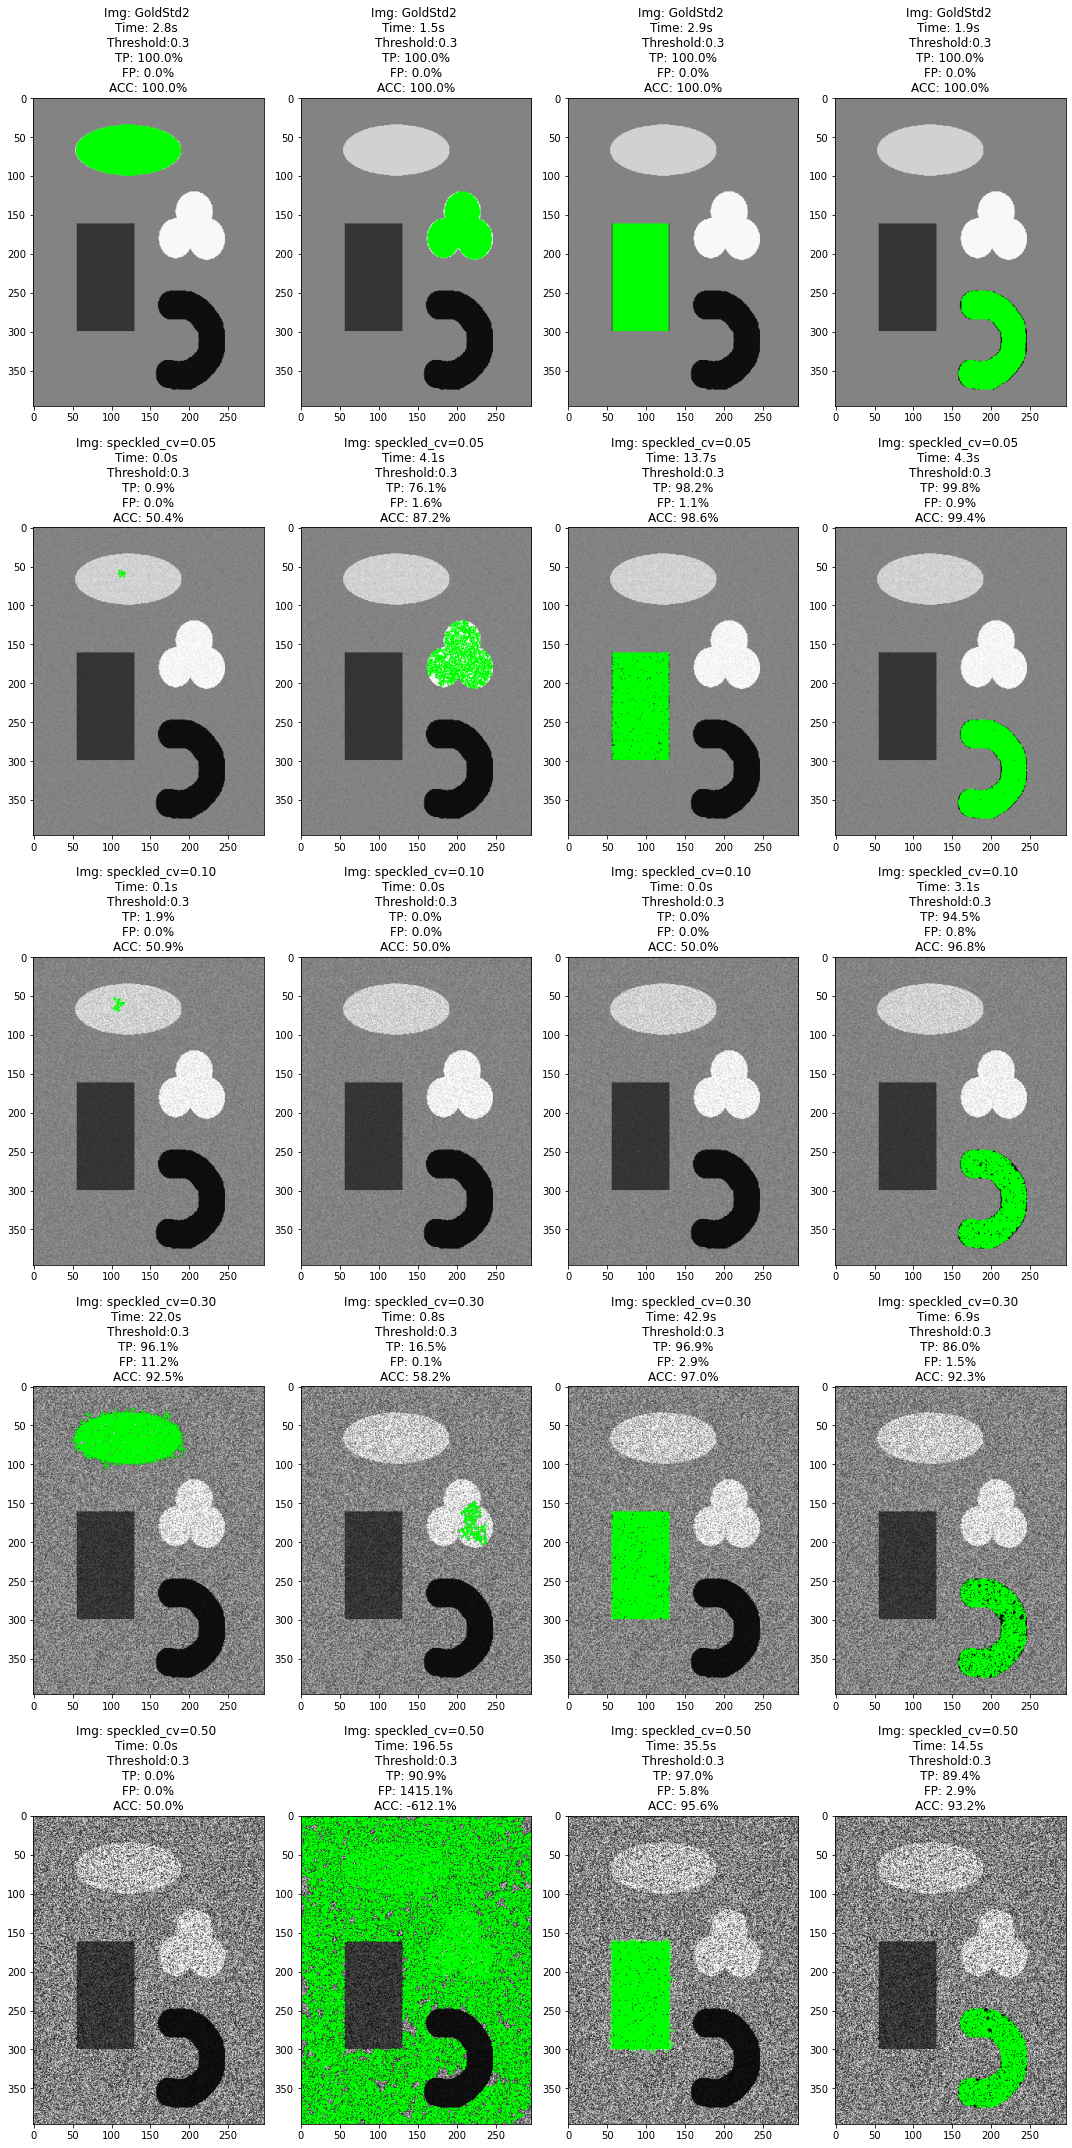

In [351]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
#seeds = [(120,60), (200, 170), (100,200), (200,350)]
seeds = [(114,60), (210, 160), (90,250), (225,330)]
#seeds = [(111,63), (215, 150), (100,240), (220,335)]

threshold=0.3

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        fz = FuzzyConnector(img, [s],threshold=threshold)
        cs = fz.run2()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()

#results_df_lc_1_seeds1 = pd.DataFrame(results)
results_df_lc_1_seeds2 = pd.DataFrame(results)
#results_df_lc_1_seeds3 = pd.DataFrame(results)

In [352]:
results_df_lc_1_seeds2.groupby('Imagem').mean()

Tempo exeução  theta      TP%      FP%     ACC%
Imagem                                                           
GoldStd2                  2.275    0.3  100.000    0.000  100.000
speckled_cv=0.05          5.525    0.3   68.750    0.900   83.900
speckled_cv=0.10          0.800    0.3   24.100    0.200   61.925
speckled_cv=0.30         18.150    0.3   73.875    3.925   85.000
speckled_cv=0.50         61.625    0.3   69.325  355.950  -93.325

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

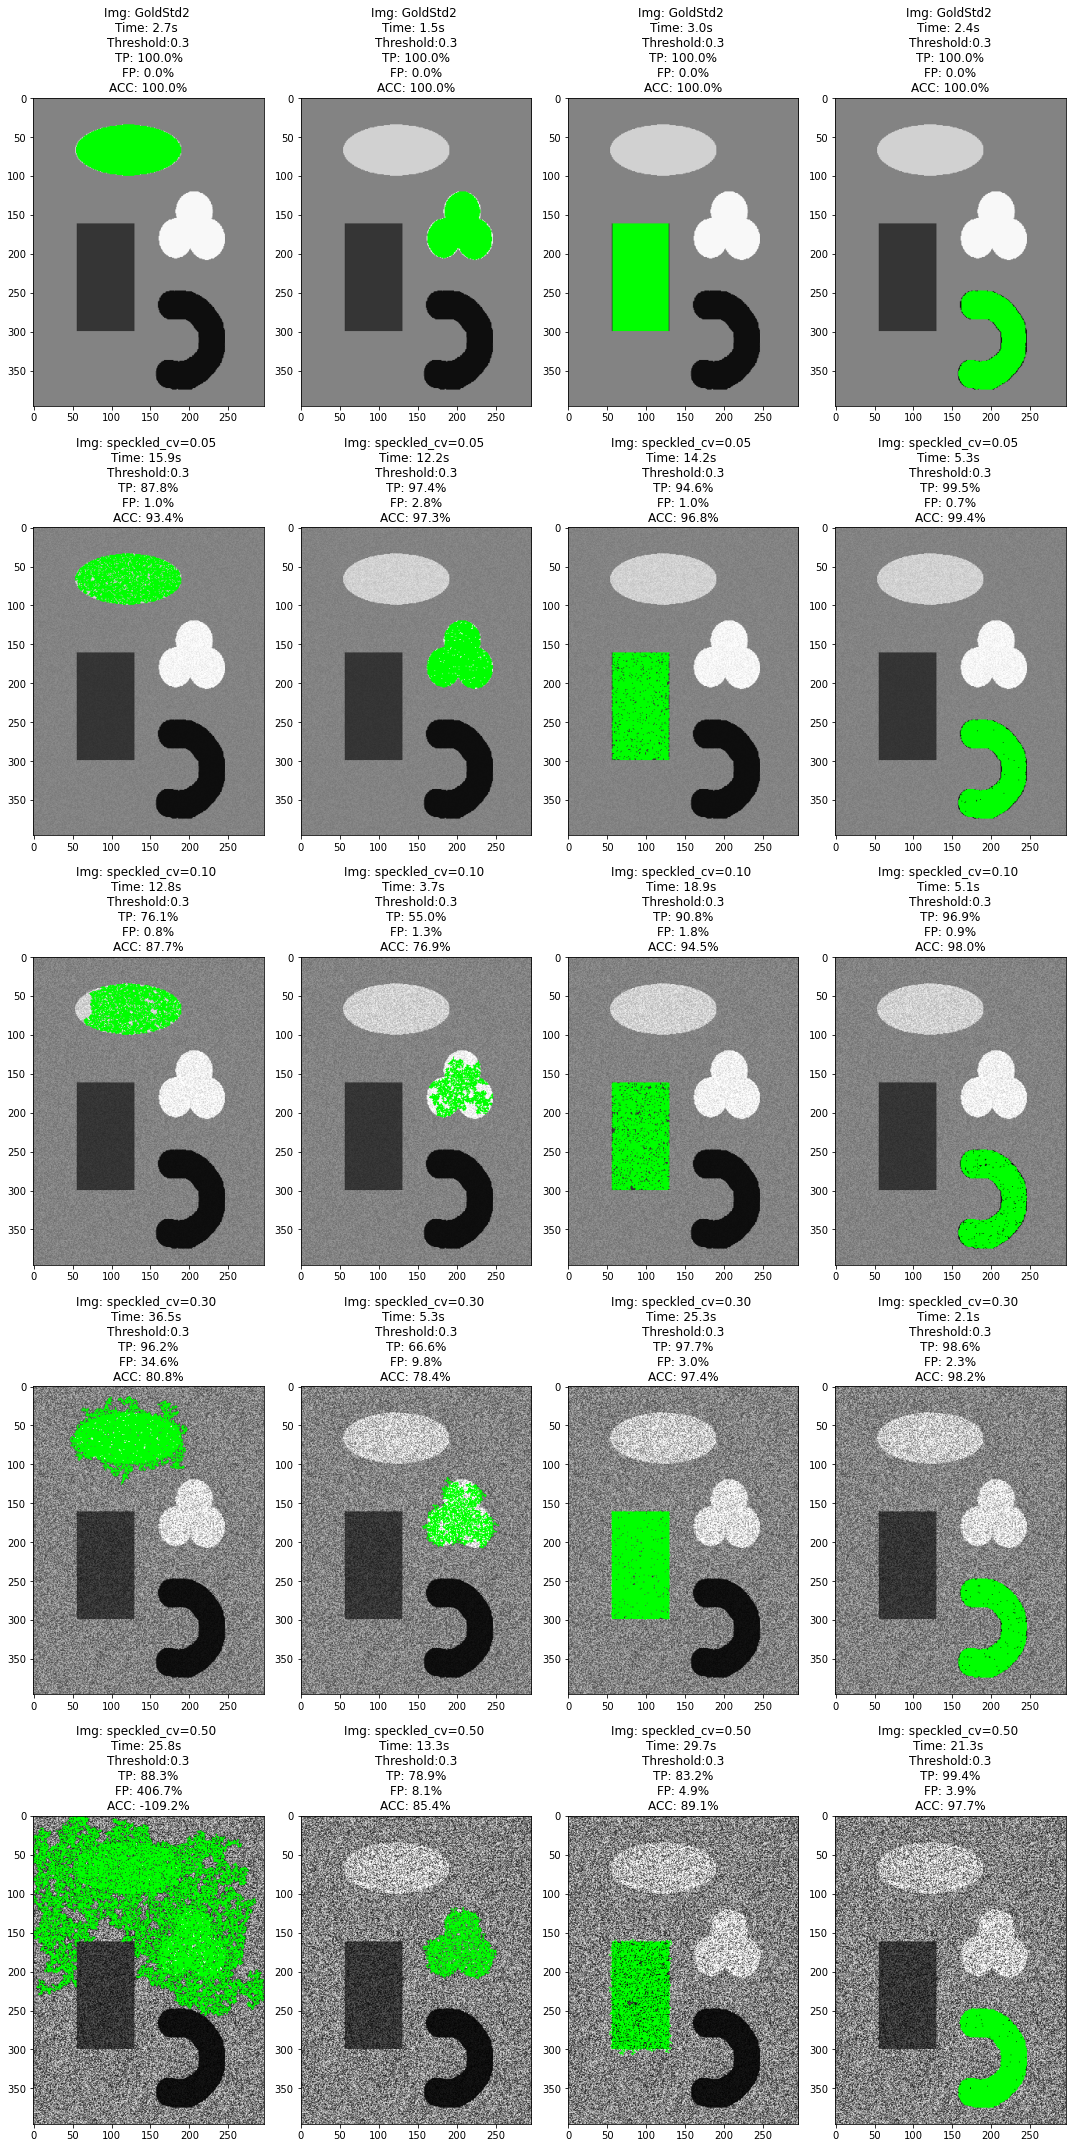

In [353]:
import timeit


imgs = ['../imagens/fig_GoldStd2.tif',
        '../imagens/fig_speckled_cv=0.05.tif',
        '../imagens/fig_speckled_cv=0.10.tif',
        '../imagens/fig_speckled_cv=0.30.tif',
        '../imagens/fig_speckled_cv=0.50.tif'
        ]
#seeds = [(120,60), (200, 170), (100,200), (200,350)]
#seeds = [(114,60), (210, 160), (90,250), (225,330)]
seeds = [(111,63), (215, 150), (100,240), (220,335)]

threshold=0.3

results=[]

fig = plt.figure(figsize=(15,30))
axes = fig.subplots(nrows=5, ncols=4)

i=0
for img_path in imgs:
    
    img = io.imread(img_path, plugin='imageio')
    img = img.astype(np.int64, casting='unsafe')
    j=0
    for s in seeds:
        
        start = timeit.default_timer()

        fz = FuzzyConnector(img, [s],threshold=threshold)
        cs = fz.run2()
        
        stop = timeit.default_timer()        
        time = (stop - start)
        
        p = get_conn_scene_plot(img, cs)
        
        TP=FP=ACC=0
        obj=""
        if j==0:
            TP,FP,ACC = evaluate(img, cs, goldstd_elipse)
            obj="Elipse"
        elif j==1:
            TP,FP,ACC = evaluate(img, cs, goldstd_arvore)
            obj="Árvore"
        elif j==2:
            TP,FP,ACC = evaluate(img, cs, goldstd_quadrado)
            obj="Retângulo"
        elif j==3:
            TP,FP,ACC = evaluate(img, cs, goldstd_c_invertido)
            obj="C invertido"
            

        axes[i,j].imshow(p, cmap='gray')
        title = img_path.split("/")[2].replace(".tif","").replace("fig_","")
        axes[i,j].set_title("Img: {} \nTime: {}s \nThreshold:{}\nTP: {}%\nFP: {}%\nACC: {}%".format(title, round(time,1), threshold, round(TP,1), round(FP,1), round(ACC,1)))
        results.append({"Imagem":title, "Objeto":obj,"Tempo exeução":round(time,1), "theta":threshold, "TP%":round(TP,1), "FP%":round(FP,1), "ACC%":round(ACC,1)})
        j=j+1
    i=i+1
    
    
plt.tight_layout()
plt.show()

#results_df_lc_1_seeds1 = pd.DataFrame(results)
#results_df_lc_1_seeds2 = pd.DataFrame(results)
results_df_lc_1_seeds3 = pd.DataFrame(results)

In [354]:
results_df_lc_1_seeds3.groupby("Imagem").mean()

Tempo exeução  theta      TP%      FP%     ACC%
Imagem                                                           
GoldStd2                  2.400    0.3  100.000    0.000  100.000
speckled_cv=0.05         11.900    0.3   94.825    1.375   96.725
speckled_cv=0.10         10.125    0.3   79.700    1.200   89.275
speckled_cv=0.30         17.300    0.3   89.775   12.425   88.700
speckled_cv=0.50         22.525    0.3   87.450  105.900   40.750

In [356]:
df0 = results_df_lc_1_seeds1.groupby("Imagem").mean()
df1 = results_df_lc_1_seeds1.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="T|TP|FP|ACC").add_suffix(" (S1)")
df2 = results_df_lc_1_seeds2.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="T|TP|FP|ACC").add_suffix(" (S2)")
df3 = results_df_lc_1_seeds3.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="T|TP|FP|ACC").add_suffix(" (S3)")

pd.concat([df0[['theta']], df1, df2, df3,], axis=1)

theta  T (seg) (S1)  TP% (S1)  FP% (S1)  ACC% (S1)  \
Imagem                                                                 
GoldStd2            0.3         2.875   100.000     0.000    100.000   
speckled_cv=0.05    0.3         4.125    54.900     0.950     77.000   
speckled_cv=0.10    0.3        14.200    90.475     1.750     94.350   
speckled_cv=0.30    0.3        21.775    95.450     5.000     95.225   
speckled_cv=0.50    0.3        22.550    88.200    82.325     52.925   

                  T (seg) (S2)  TP% (S2)  FP% (S2)  ACC% (S2)  T (seg) (S3)  \
Imagem                                                                        
GoldStd2                 2.275   100.000     0.000    100.000         2.400   
speckled_cv=0.05         5.525    68.750     0.900     83.900        11.900   
speckled_cv=0.10         0.800    24.100     0.200     61.925        10.125   
speckled_cv=0.30        18.150    73.875     3.925     85.000        17.300   
speckled_cv=0.50        61.625    69.325   355.950    -93.325        22.525   

                  TP% (S3)  FP% (S3)  ACC% (S3)  
Imagem                                           
GoldStd2           100.000     0.000    100.000  
speckled_cv=0.05    94.825     1.375     96.725  
speckled_cv=0.10    79.700     1.200     89.275  
speckled_cv=0.30    89.775    12.425     88.700  
speckled_cv=0.50    87.450   105.900     40.750

### Avaliando diferença no tempo de processamento entre Label Setting e Label Correcting

In [358]:
df0 = results_df_lc_1_seeds1.groupby("Imagem").mean()
df1 = results_df_lc_1_seeds1.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="seg").add_suffix(" (S1)")
df2 = results_df_lc_1_seeds2.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="seg").add_suffix(" (S2)")
df3 = results_df_lc_1_seeds3.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="seg").add_suffix(" (S3)")

x1 = pd.concat([df1, df2, df3,], axis=1)

In [359]:
df0 = results_df_ls_1_seeds1.groupby("Imagem").mean()
df1 = results_df_ls_1_seeds1.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="seg").add_suffix(" (S1)")
df2 = results_df_ls_1_seeds2.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="seg").add_suffix(" (S2)")
df3 = results_df_ls_1_seeds3.rename(columns={"Tempo exeução": "T (seg)"}).groupby("Imagem").mean().filter(regex="seg").add_suffix(" (S3)")

x2 = pd.concat([df1, df2, df3,], axis=1)

In [360]:
z = pd.concat([x1.mean(axis=1), x2.mean(axis=1)], axis=1)
z.columns=['Tempo de execução (Algoritmo 1)', 'Tempo de execução (Algoritmo 2)']
z

Tempo de execução (Algoritmo 1)  \
Imagem                                              
GoldStd2                                 2.516667   
speckled_cv=0.05                         7.183333   
speckled_cv=0.10                         8.375000   
speckled_cv=0.30                        19.075000   
speckled_cv=0.50                        35.566667   

                  Tempo de execução (Algoritmo 2)  
Imagem                                             
GoldStd2                                 1.350000  
speckled_cv=0.05                         3.216667  
speckled_cv=0.10                         3.416667  
speckled_cv=0.30                         7.891667  
speckled_cv=0.50                        16.858333

### Another Application: Trying to segment disks in a lumbar RM

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


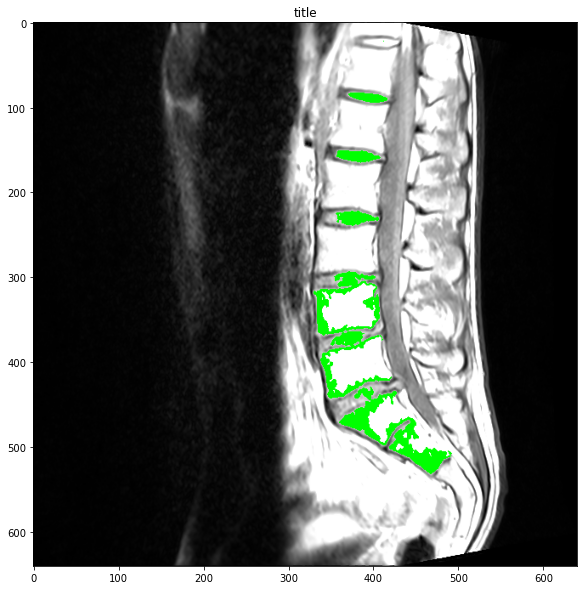

In [29]:
plot_conn_scene(img, cs, figsize=(10,10), title="title")